# Шаблон для проекта по A/B - тестам.

### `chat_id ` из Телеграма:

In [ ]:
446110916

------------------

##  <ins>Задание 1.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

**Контекст**

В связи с постановлением Центрального Банка
наше текущее содержание диалога с клиентом (скрипт)
операторов считается слишком жёстким,
и нам нужно придумать более мягкий скрипт,
который будет всё ещё иметь хорошие показатели.
У нас есть два варианта более мягкого скрипта,
и мы хотим выбрать лучший из них.
При этом у нас нет времени 
чтобы ждать вызревания долгих метрик вроде PV.
        
**Тест**

Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части мы продаём одним вариантом скрипта,
другой - другим.
Целью этого теста
является поиск наилучшего скрипта.

**Статистические вводные**

Уровень значимости 5%.
Мы хотели бы различать 8%-ное
изменение целевой метрики
с вероятностью 80%.

Значит, **alpha** = 0.05
**uplift** = 0.08
**MDE** = 0.08 * среднее на исторических данных
**beta** = 0.20

In [1]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import math
import io

Посмотрим датасет

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hist_telesales.csv to hist_telesales.csv


In [3]:
import io
hist_data = pd.read_csv(io.BytesIO(uploaded['hist_telesales.csv']))

In [5]:
hist_data.head(3)

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
0,0,1,0,90,0,-90
1,1,0,0,5,0,-5
2,2,0,0,68,0,-68


### 1. Необходимо выбрать метрику и привести аргументацию.

В качестве целевой метрики посмотрим **NPV**. 

**Нулевая гипотеза (Н0):**

Введение более мягкого скрипта диалога не повлияло на NPV. Различия между тестовой и контрольной группами случайны, не обладают статистической значимостью.




In [6]:
hist_data['NPV'].mean()

281.4598051579108

In [7]:
hist_data['NPV'].std()

677.6649079055694

In [8]:
hist_data['NPV'].describe()

count    72161.000000
mean       281.459805
std        677.664908
min      -4406.000000
25%        -54.000000
50%        -18.000000
75%        535.000000
max      41144.000000
Name: NPV, dtype: float64

<Axes: >

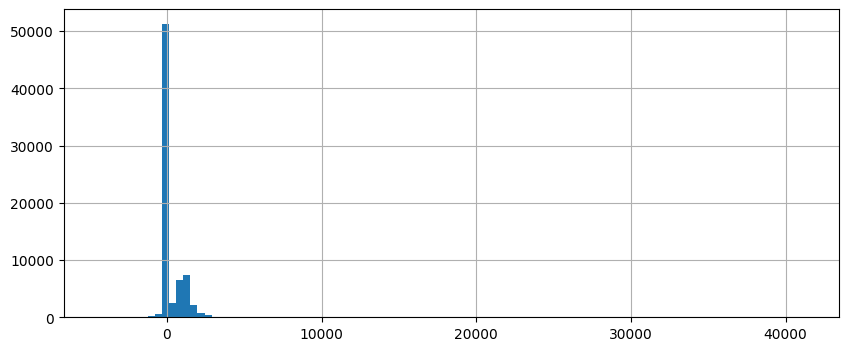

In [9]:
hist_data['NPV'].hist(bins = 100, figsize=(10, 4))


<ipython-input-10-f4c763e8e4ec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hist_data['NPV'])


<Axes: xlabel='NPV', ylabel='Density'>

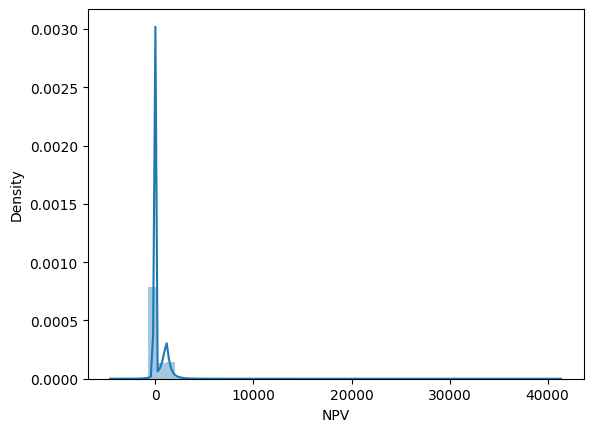

In [10]:
sns.distplot(hist_data['NPV'])

Из графиков и метода describe видим, что имеются выбросы в данных, попробуем их почистить. 

In [11]:
lower_bound = hist_data['NPV'].quantile(q = 0.25)
upper_bound = hist_data['NPV'].quantile(q = 0.75)

In [12]:
upper_bound

535.0

In [13]:
cleaned_hist_data = hist_data[(hist_data['NPV'] > lower_bound) & (hist_data['NPV'] < upper_bound)]

<ipython-input-14-e91e413f6bd1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_hist_data['NPV'])


<Axes: xlabel='NPV', ylabel='Density'>

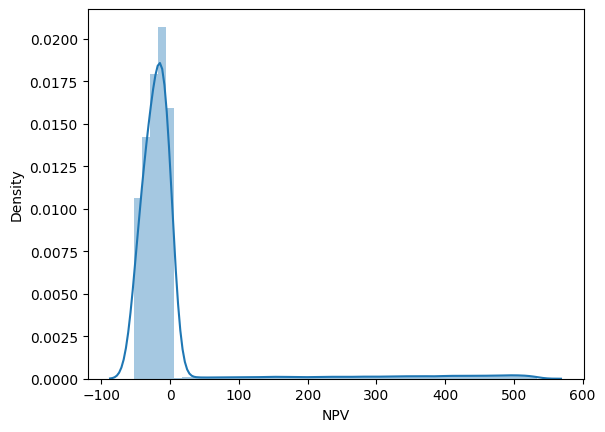

In [14]:
sns.distplot(cleaned_hist_data['NPV'])

Распределение похоже на нормальное с правосторонней асимметрией

In [32]:
cleaned_hist_data['NPV'].describe()

count    35913.000000
mean         1.033776
std         93.704431
min        -53.000000
25%        -32.000000
50%        -18.000000
75%         -6.000000
max        534.000000
Name: NPV, dtype: float64

In [33]:
hist_std = cleaned_hist_data['NPV'].std()

### 2. Альтернатива в критерии.


**Альтрнативная гипотеза (Н1):** 

Введение более мягкого скрипта диалога подняло NPV на 8%. NPV в тестовой группе выше, чем в контрольной и это различие - результат изменений. Мы тестируем отклонение вверх, значит, проверяем правостороннюю гипотезу.


### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Сейчас будем считать.. У нас односторонняя альтернатива и бинарное распределение. Используем соответствующую формулу

MDE = uplift * среднее на исторических данных

In [18]:
uplift = 0.08

In [29]:
MDE = cleaned_hist_data['NPV'].mean() * uplift

### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

### 4. Принятие решения. Расписать подробно с аргументами.

##  <ins>Задание 2.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project2_desc`.

### 1. Необходимо выбрать метрику и привести аргументацию.

### 2. Альтернатива в критерии.

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>:

### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.